In [1]:
# imports
import os
os.environ['JAVA_HOME'] = r"C:\Program Files\Java\jdk-25\bin"
import geopandas as gpd

import r5py
import datetime

from matplotlib import pyplot as plt
from shapely import Point, Polygon, unary_union

In [2]:
ct_gdf = gpd.read_file('./Census tract - Percentage of visible minority/Census tract - Percentage of visible minority, n.i.e..shp')
ct_gdf.rename(columns={'Value': 'Percentage of Home Ownership 2021'}, inplace=True)

In [3]:
da_home = gpd.read_file('./Dissemination area - Homeownership rate (%)/Dissemination area - Homeownership rate (%).shp')
da_home.rename(columns={'Value': 'Percentage of Home Ownership 2021'}, inplace=True)

In [4]:
city_bound = gpd.GeoSeries(da_home.geometry.union_all())
city_boundary_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': city_bound}, crs = ct_gdf.crs)

In [5]:
toronto_ct = ct_gdf.overlay(city_boundary_gdf, how = 'intersection')

C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 37 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [6]:
toronto_ct['centroid'] = toronto_ct.geometry.centroid

In [7]:
pbf_path = r"C:\Users\saman\Downloads\GGR375 Project\GGR375-Group-Project\Toronto.osm.pbf "
gtfs_path = r"C:\Users\saman\Downloads\GGR375 Project\GGR375-Group-Project\GTFS_2015.zip"

tn = r5py.TransportNetwork(pbf_path, gtfs = gtfs_path)

In [8]:
subway_lines = gpd.read_file('./sept_2015_subway/subway.shp')
subway_lines = subway_lines.to_crs(toronto_ct.crs)
streetcar_lines = gpd.read_file('./sept_2015_streetcar/streetcar.shp')
streetcar_lines = streetcar_lines.to_crs(toronto_ct.crs)
bus_lines = gpd.read_file('./sept_2015_bus/bus.shp')
bus_lines = bus_lines.to_crs(toronto_ct.crs)


In [ ]:
def generate_iso(point, time):
    # Generates a <time> minute isochrone around <point> using a combination transit-walking network
    # returns the isochrone as a GDF with attributes 'time', 'geometry', and 'id' with crs to match
    # toronto_ct.crs
    
    point_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': point}, crs = toronto_ct.crs)

    iso = r5py.Isochrones(
        tn,
        origins = point_gdf,
        departure=datetime.datetime(2015, 9, 10, 8, 30),
        transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
        isochrones=[time]
    )
    iso = iso.to_crs(toronto_ct.crs)
    return iso.geometry




In [10]:
toronto_ct = toronto_ct[['geometry', 'Location', 'DGUID', 'centroid']]

In [11]:
study_area = toronto_ct.union_all().area

In [ ]:
def calc_percentage(iso):
    # Calculate the percentage of the study area covered by the isochrone area
    p = iso[0].geometry.area / study_area
    return p

In [14]:
new_total = toronto_ct.iloc[300:400][['DGUID', 'geometry', 'centroid']]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
new_total['geometry'] = new_total.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)

C:\Users\saman\AppData\Local\Temp\ipykernel_18136\2815547236.py:3: UserWarning: Geometry column does not contain geometry.
  new_total['geometry'] = new_total.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)


<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

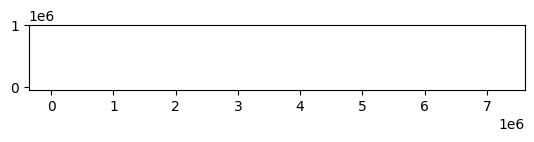

In [54]:
#x = new_total.geometry.polygonize()
#print(new_total.geometry.values)
print(type(new_total))
ids = []
geoms = []
for id in new_total['DGUID'].values:
    p = new_total[new_total['DGUID'] == id].geometry
    ids.append(id)
    geoms.append(p.tolist()[0][1].to_list()[0])
    #print(type(p.tolist()[0][1].to_list()[0]))
    #geoms.append(p.tolist()[0][1].polygonize())
d = {'DGUID': ids, 'geometry': geoms}
#print(toronto_ct_subset2['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

new_gdf = gpd.GeoDataFrame(d, crs = toronto_ct.crs)
new_gdf = new_gdf.to_crs(toronto_ct.crs)
new_gdf['geometry'] = new_gdf['geometry'].polygonize()
fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
new_gdf.plot(ax=ax, color = 'red')
#toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
#toronto_ct_subset2.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
import pandas as pd

#total_gdf = pd.concat([total_gdf, toronto_ct_subset4])
#total_gdf.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
subway_lines.plot(ax=ax, color='white')

In [ ]:
def generate_iso(point, time):
    # Generates a <time> minute isochrone around <point> using a combination transit-walking network
    # returns the isochrone as one polygon
    
    point_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': point}, crs = toronto_ct.crs)

    iso = r5py.Isochrones(
        tn,
        origins = point_gdf,
        departure=datetime.datetime(2015, 9, 10, 8, 30),
        transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
        isochrones=[time]
    )
    iso = iso.to_crs(toronto_ct.crs)

    return iso.geometry.polygonize().union_all()



# pt = toronto_ct.iloc[350]['centroid']

# test = generate_iso(pt, 15)


<Axes: >

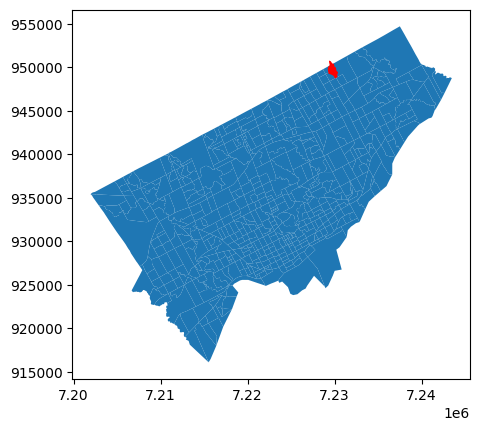

In [74]:
#print(type(test.polygonize().union_all()))
#print(test.polygonize())
#g = test.polygonize().union_all()

test_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': test}, crs = toronto_ct.crs)

fig, ax = plt.subplots()

toronto_ct.plot(ax=ax)
test_gdf.plot(ax=ax, color = 'red')


<Axes: >

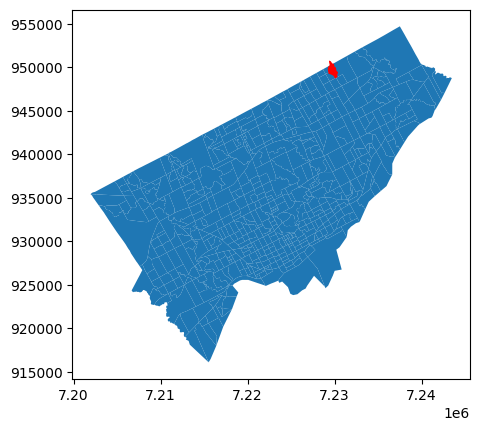

In [69]:
fig, ax = plt.subplots()
toronto_ct.plot(ax=ax)
test_gdf.plot(ax=ax, color = 'red')

In [76]:
new_total = toronto_ct.iloc[300:][['DGUID', 'geometry', 'centroid']]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
new_total['geometry'] = new_total.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)

<Axes: >

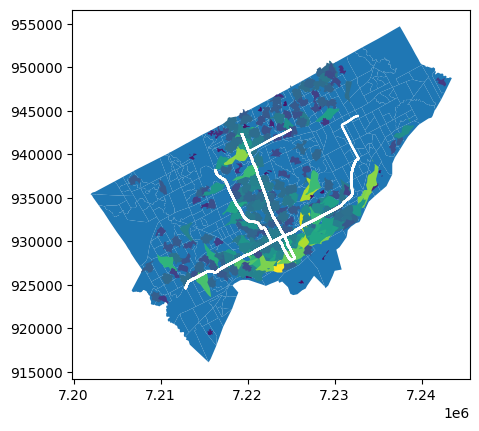

In [79]:
new_total['area_percentage'] = new_total.geometry.area / study_area

#print(toronto_ct_subset2['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
#toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
#toronto_ct_subset2.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
import pandas as pd

#total_gdf = pd.concat([total_gdf, toronto_ct_subset4])
#total_gdf.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
new_total.plot(ax=ax, column='area_percentage')
subway_lines.plot(ax=ax, color='white')

In [92]:

print(new_total.columns)
writable = new_total[['DGUID', 'geometry', 'area_percentage']]
writable.to_file('DGUID_ISO_15_SECOND_HALF.shp')

Index(['DGUID', 'geometry', 'centroid', 'area_percentage'], dtype='object')


C:\Users\saman\AppData\Local\Temp\ipykernel_18136\3798569040.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  writable.to_file('DGUID_ISO_15_SECOND_HALF.shp')
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'area_percentage' to 'area_perce'
  ogr_write(


In [ ]:
first_half = gpd.read_file('DGUID_ISO_15_unfinished.shp')
first_half = first_half.to_crs(toronto_ct.crs)
first_perc = gpd.read_file('DGUID_PERCENTAGE_unfinished.shp')
print(first_perc.columns)



Index(['DGUID', 'area_perce', 'geometry'], dtype='object')


Index(['DGUID', 'area_perce', 'geometry'], dtype='object')
Index(['DGUID', 'area_percentage', 'isochrone'], dtype='object')
Index(['geometry', 'Location', 'DGUID', 'centroid', 'area_percentage',
       'isochrone'],
      dtype='object')
Index(['geometry', 'Location', 'DGUID', 'centroid', 'area_percentage'], dtype='object')
Index(['geometry', 'Location', 'DGUID', 'centroid', 'area_percentage',
       'isochrone'],
      dtype='object')


C:\Users\saman\AppData\Local\Temp\ipykernel_18136\581320073.py:48: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  DGUID_TO_PERC.to_file('DGUID_TO_PERC_FINAL2015.shp')
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'area_percentage' to 'area_perce'
  ogr_write(


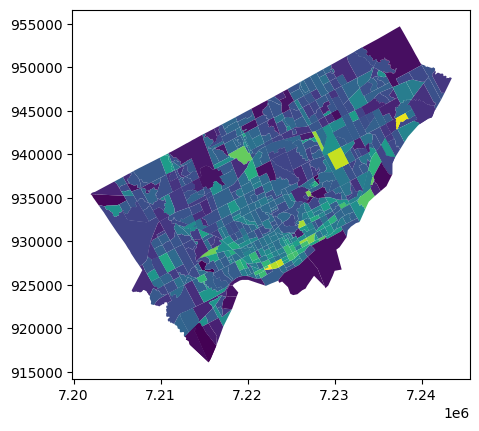

In [ ]:

first_half_proper = first_perc.to_crs(toronto_ct.crs)
print(first_half_proper.columns)
first_half_proper.rename(columns={'geometry': 'isochrone', 'area_perce': 'area_percentage'}, inplace=True)
print(first_half_proper.columns)
alltogether = toronto_ct.merge(first_half_proper, how = 'right', on = 'DGUID')
print(alltogether.columns)
alltogether = alltogether.to_crs(toronto_ct.crs)




temp = writable[['DGUID', 'area_percentage']]
temp = toronto_ct.merge(temp, how = 'right', on = 'DGUID')
print(temp.columns)
alltogether = pd.concat([alltogether, temp])

d = {'DGUID': id, 'geometry': geom, 'percentage': perc}

print(alltogether.columns)
alltogether.plot(column = 'area_percentage')


DGUID_TO_ISO_15 = alltogether[['isochrone', 'DGUID']]
DGUID_TO_PERC = alltogether[['area_percentage', 'DGUID', 'geometry']]

DGUID_TO_ISO_15.to_file('DGUID_TO_ISOCHRONE_FINAL2015.shp')
DGUID_TO_PERC.to_file('DGUID_TO_PERC_FINAL2015.shp')
# print(alltogether['area_percentage_x'].values)
#alltogether.plot(column='area_percentage')
# print(alltogether.columns)
# alltogether.plot()
#first_half_together = first_half_together.to_crs(toronto_ct.crs)
# import pandas as pd

# total = pd.concat([first_half_together, writable])

# fig,ax = plt.subplots()
#toronto_ct.plot(ax=ax, color='black')
#total.plot(cmap = 'viridis', column = 'area_percentage', ax=ax)
# first_half_together.plot(column='area_percentage')
# subway_lines.plot(ax=ax, color='white')

<Axes: >

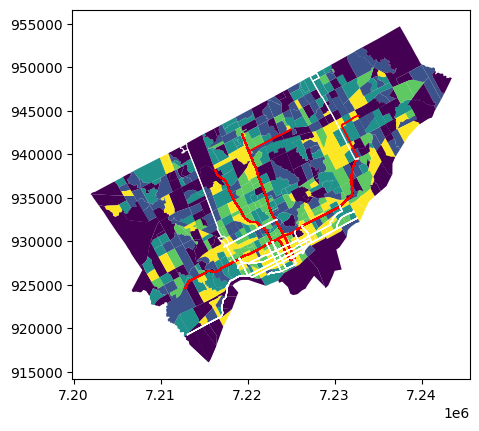

In [189]:
fig, ax= plt.subplots()
alltogether.plot(ax=ax, column = 'area_percentage', scheme = 'quantiles')
subway_lines.plot(ax=ax, color='red', linewidth=1)
streetcar_lines.plot(ax=ax, color = 'white', linewidth=0.8)
